In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
import awkward as ak
from dask.distributed import Client
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [2]:
samples = ["2Mu2E_100GeV_0p25GeV_20mm"]
fileset = utilities.make_fileset(samples, "ffntuple_v4")

runner = processor.Runner(
    #executor=processor.IterativeExecutor(),
    executor=processor.FuturesExecutor(),
    schema=ffschema.FFSchema,
    #maxchunks=1,
)

channels = ["baseNoLj", "pvAndCosmic_cuts"] #"2mu2e"
p = sidm_processor.SidmProcessor(
    channels,
    ["electron_extra"],
)

output = runner.run(fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)
out = output["out"]

Output()

Output()

Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  pvAndCosmic_cuts
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  pvAndCosmic_cuts
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  pvAndCosmic_cuts
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  pvAndCosmic_cuts
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  pvAndCosmic_cuts


# |∆ηseed|:

tracking based variable, |∆η| between GSF track and supercluster seed.

                             ┌───────────────────────────────────────────────┐
[     -inf,         0) 0     │                                               │
[        0, 0.0001083) 72.99 │█████████▍                                     │
[0.0001083, 0.0002167) 84.46 │██████████▉                                    │
[0.0002167,  0.000325) 76.73 │█████████▉                                     │
[ 0.000325, 0.0004333) 72.2  │█████████▎                                     │
[0.0004333, 0.0005417) 73.71 │█████████▌                                     │
[0.0005417,   0.00065) 67.9  │████████▊                                      │
[  0.00065, 0.0007583) 48.45 │██████▎                                        │
[0.0007583, 0.0008667) 62.8  │████████▏                                      │
[0.0008667,  0.000975) 68.72 │████████▉                                      │
[ 0.000975,  0.001083) 42.38 │█████▌                                         │
[ 0.001083,  0.001192) 58.34 │███████▌              

Text(1, 0, 'Δηseed')

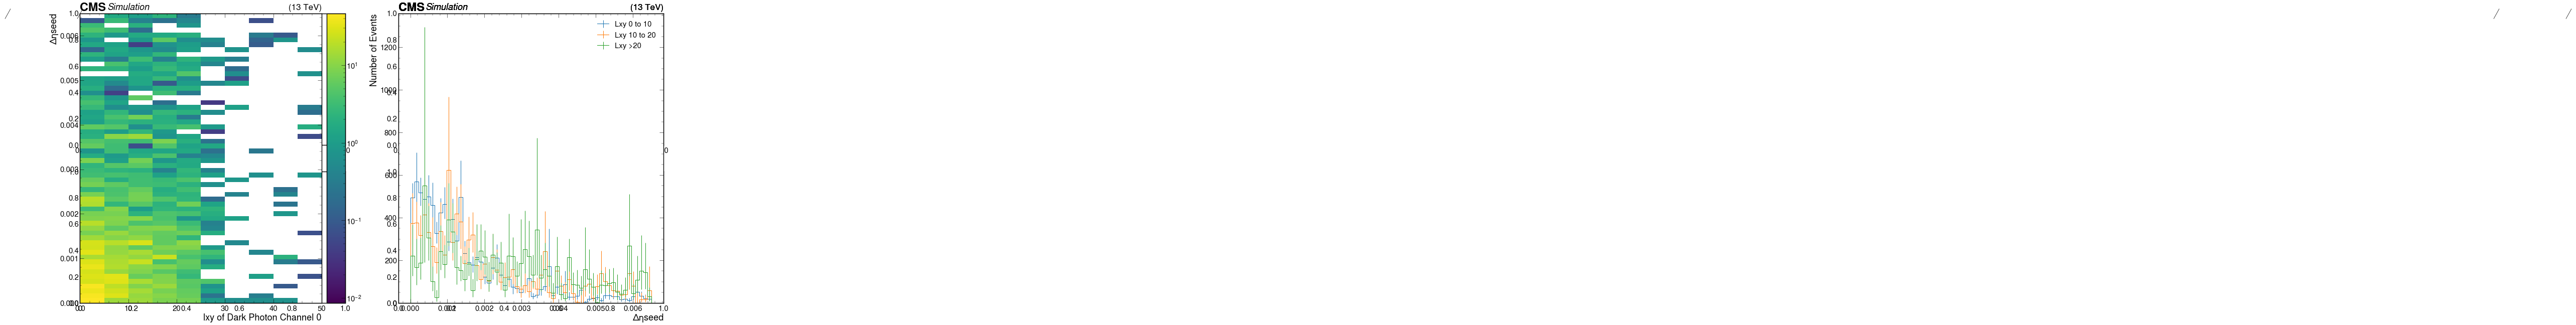

In [3]:
 for sample in samples:
    hists = out[sample]["hists"]
plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(hists["electron_GsfEleDEtaInSeedCut2d"][channels[1], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 0")
plt.ylabel("Δηseed")
plt.xlim(0,50)
plt.subplot(1, 2, 2)
for sample in samples:
         hists = out[sample]["hists"]
utilities.plot(hists["electron_GsfEleDEtaInSeedCut2d"][channels[1],slice(0, 3, sum),:], label = "Lxy 0 to 10",density=True,flow='none')
utilities.plot(hists["electron_GsfEleDEtaInSeedCut2d"][channels[1],slice(3,5, sum),:], label = "Lxy 10 to 20",density=True,flow='none')
utilities.plot(hists["electron_GsfEleDEtaInSeedCut2d"][channels[1],slice(5,101, sum),:], label = "Lxy >20" ,density=True,flow='none')
plt.legend() 
print(hists["electron_GsfEleDEtaInSeedCut2d"][channels[1],slice(0, 3, sum),:34]) 
plt.ylabel("Number of Events")
plt.xlabel("Δηseed")

In [4]:
(hists["electron_GsfEleDEtaInSeedCut2d"][channels[1],slice(0, 3, sum),:])

Hist(Regular(60, 0, 0.0065, name='electron_GsfEleDEtaInSeedCut'), storage=Weight()) # Sum: WeightedSum(value=1365.16, variance=2731.52) (WeightedSum(value=1576.65, variance=2924.38) with flow)

356.8 Fail, 22.61% Fail

# |∆φin|:

tracking based variable, |∆φ| between GSF track and supercluster.

                            ┌────────────────────────────────────────────────┐
[    -inf,        0) 0      │                                                │
[       0, 0.001125) 26.62  │██████████████████████████▌                     │
[0.001125,  0.00225) 16.73  │████████████████▋                               │
[ 0.00225, 0.003375) 13.13  │█████████████                                   │
[0.003375,   0.0045) 39.01  │██████████████████████████████████████▊         │
[  0.0045, 0.005625) 11.41  │███████████▍                                    │
[0.005625,  0.00675) 5.86   │█████▉                                          │
[ 0.00675, 0.007875) 12.55  │████████████▌                                   │
[0.007875,    0.009) 17.52  │█████████████████▍                              │
[   0.009,  0.01012) 6.519  │██████▌                                         │
[ 0.01012,  0.01125) 12.74  │████████████▋                                   │
[ 0.01125,  0.01237) 19.5   │███████████████████▍   

Text(1, 0, '∆φin')

/opt/conda/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Glyph 8710 (\N{INCREMENT}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8710 (\N{INCREMENT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


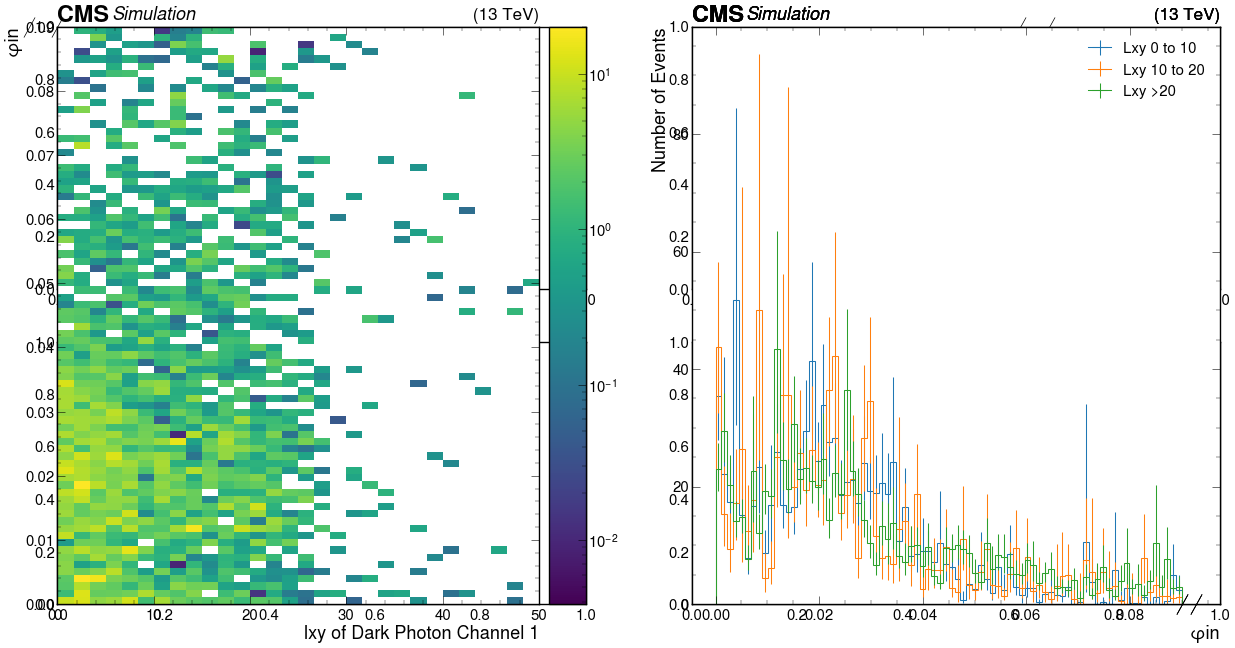

In [5]:
 for sample in samples:
    hists = out[sample]["hists"]
plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(hists["electron_GsfEleDPhiInCut2d"][channels[1], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 1")
plt.ylabel("∆φin")
plt.xlim(0,50)
plt.subplot(1, 2, 2)
for sample in samples:
         hists = out[sample]["hists"]
utilities.plot(hists["electron_GsfEleDPhiInCut2d"][channels[1],slice(0, 3, sum),:], label = "Lxy 0 to 10",density=True)
utilities.plot(hists["electron_GsfEleDPhiInCut2d"][channels[1],slice(3,5, sum),:], label = "Lxy 10 to 20",density=True)
utilities.plot(hists["electron_GsfEleDPhiInCut2d"][channels[1],slice(5,101, sum),:], label = "Lxy >20" ,density=True)
plt.legend() 
print(hists["electron_GsfEleDPhiInCut2d"][channels[1],slice(0, 3, sum),:75])   
plt.ylabel("Number of Events")
plt.xlabel("∆φin")

In [6]:
(hists["electron_GsfEleDPhiInCut2d"][channels[1],slice(0, 3, sum),:])

Hist(Regular(80, 0, 0.09, name='electron_GsfEleDPhiInCut'), storage=Weight()) # Sum: WeightedSum(value=669.352, variance=1210.5) (WeightedSum(value=709.921, variance=1251.37) with flow)

195.1 Fail, 9.3% Fail

# |1/E - 1/𝒑|: 

absolute value of the difference between the ECAL supercluster energy inverse and the GSF track momentum inverse.

                          ┌──────────────────────────────────────────────────┐
[   -inf,       0) 0      │                                                  │
[      0, 0.00375) 78.04  │█████████████████████████████████████             │
[0.00375,  0.0075) 92.73  │████████████████████████████████████████████      │
[ 0.0075, 0.01125) 81.96  │██████████████████████████████████████▉           │
[0.01125,   0.015) 63.72  │██████████████████████████████▎                   │
[  0.015, 0.01875) 58.93  │████████████████████████████                      │
[0.01875,  0.0225) 42.4   │████████████████████▏                             │
[ 0.0225, 0.02625) 18.97  │█████████                                         │
[0.02625,    0.03) 21.02  │██████████                                        │
[   0.03, 0.03375) 21.69  │██████████▎                                       │
[0.03375,  0.0375) 15.84  │███████▌                                          │
[ 0.0375, 0.04125) 20.42  │█████████▊               

Text(0, 1, '|1/E - 1/p|')

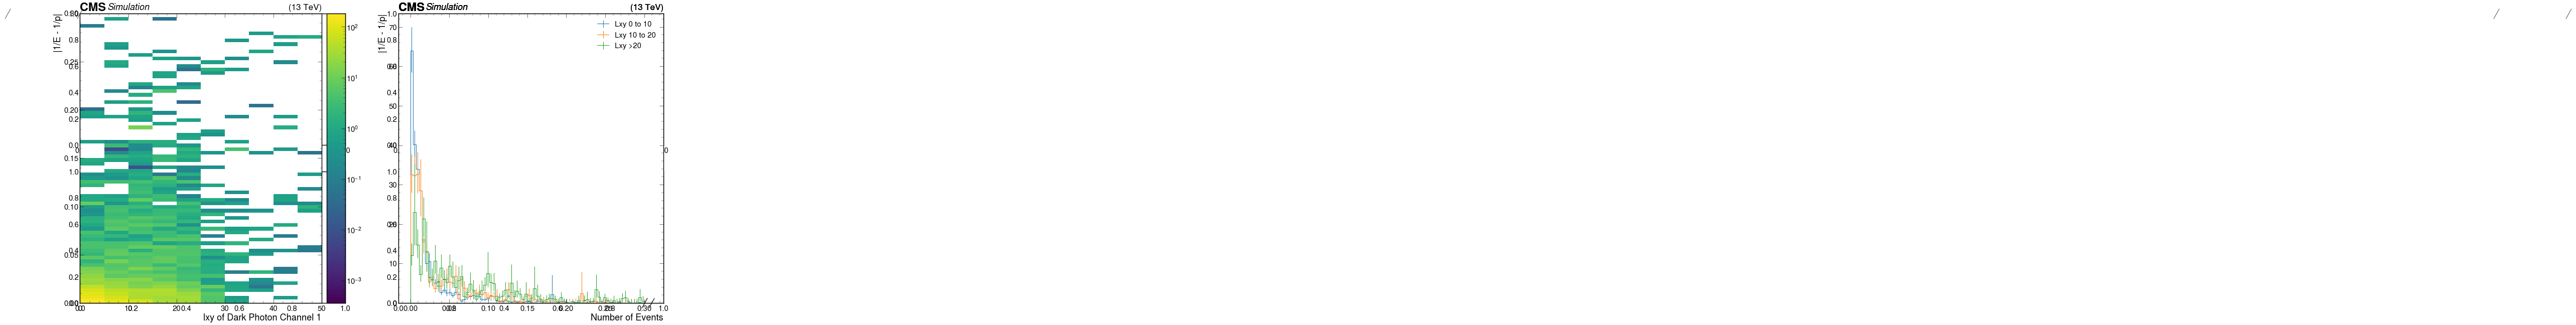

In [7]:
for sample in samples:
    hists = out[sample]["hists"]
plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[1], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 1")
plt.ylabel("|1/E - 1/p|")
plt.xlim(0,50)
plt.subplot(1, 2, 2)
for sample in samples:
         hists = out[sample]["hists"]
utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[1],slice(0, 3, sum),:], label = "Lxy 0 to 10",density=True)
utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[1],slice(3,5, sum),:], label = "Lxy 10 to 20",density=True)
utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[1],slice(5,101, sum),:], label = "Lxy >20" ,density=True)
plt.legend() 
print(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[1],slice(3, 101, sum),: 52])   
plt.xlabel("Number of Events")
plt.ylabel("|1/E - 1/p|")

In [8]:
(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[1],slice(0, 3, sum),:])

Hist(Regular(80, 0, 0.3, name='electron_GsfEleEInverseMinusPInverseCut'), storage=Weight()) # Sum: WeightedSum(value=1561.25, variance=2912.26) (WeightedSum(value=1576.65, variance=2924.38) with flow)

103.2 Fail, 6.55% Fail 

# Isolation:
relative isolation value with effective area corrections. It is calculated by considering all PFCandidates whose distance to the electron in question satisfies ∆R < 0.3 in the (η, φ) plane:

Iso = (Isoch + Isonh + Isopho)/pT

                      ┌──────────────────────────────────────────────────────┐
[ -inf,     0) 0      │                                                      │
[    0, 0.005) 371.4  │█████████████████████████████████████████████████████ │
[0.005,  0.01) 52.06  │███████▍                                              │
[ 0.01, 0.015) 24.8   │███▌                                                  │
[0.015,  0.02) 39.02  │█████▋                                                │
[ 0.02, 0.025) 24.01  │███▍                                                  │
[0.025,  0.03) 22.57  │███▎                                                  │
[ 0.03, 0.035) 23.41  │███▍                                                  │
[0.035,  0.04) 15.62  │██▎                                                   │
[ 0.04, 0.045) 18.45  │██▋                                                   │
[0.045,  0.05) 11.25  │█▋                                                    │
[ 0.05, 0.055) 13.91  │██                           

Text(0, 1, 'Isolation')

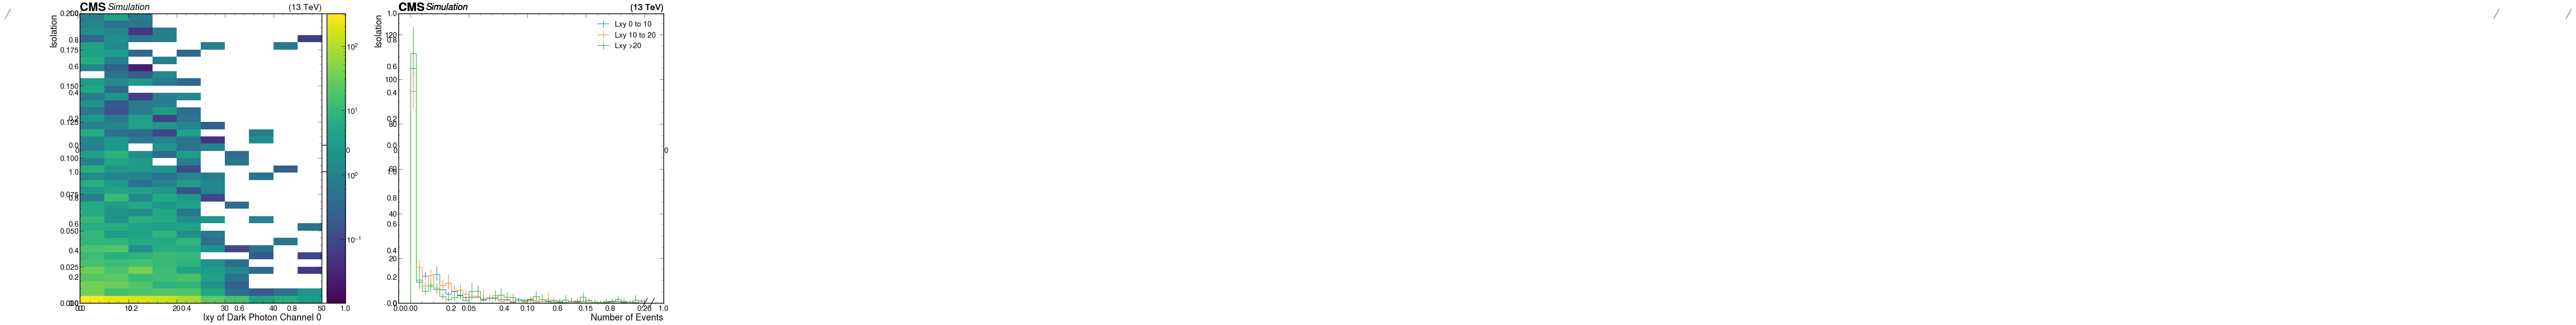

In [9]:
for sample in samples:
    hists = out[sample]["hists"]
plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[1], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 1")
plt.ylabel("Isolation")
plt.xlim(0,50)
plt.subplot(1, 2, 2)
for sample in samples:
         hists = out[sample]["hists"]
utilities.plot(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[1],slice(0, 3, sum),:], label = "Lxy 0 to 10",density=True)
utilities.plot(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[1],slice(3,5, sum),:], label = "Lxy 10 to 20",density=True)
utilities.plot(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[1],slice(5,101, sum),:], label = "Lxy >20" ,density=True)
plt.legend() 
print(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[1],slice(3, 101, sum),:])   
plt.xlabel("Number of Events")
plt.ylabel("Isolation")

In [10]:
(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[1],slice(0, 3, sum),:])

Hist(Regular(40, 0, 0.2, name='electron_GsfEleRelPFIsoScaledCut'), storage=Weight()) # Sum: WeightedSum(value=1378.74, variance=2490.47) (WeightedSum(value=1576.65, variance=2924.38) with flow)

The correct Weighted Sum but I'm not sure how to find the electrons that fail

# σiηiη:

shower shape variable, defined as the energy-weighted standard deviation of
a single crystal eta within the 5 × 5 crystals centered at the crystal with maximum
energy.

                              ┌──────────────────────────────────────────────┐
[     -inf,         0) 0      │                                              │
[        0, 0.0003333) 351.7  │███████████████████████████████▏              │
[0.0003333, 0.0006667) 0.9429 │▏                                             │
[0.0006667,     0.001) 5.168  │▌                                             │
[    0.001,  0.001333) 0.373  │                                              │
[ 0.001333,  0.001667) 0      │                                              │
[ 0.001667,     0.002) 1.091  │▏                                             │
[    0.002,  0.002333) 1.265  │▏                                             │
[ 0.002333,  0.002667) 0.2789 │                                              │
[ 0.002667,     0.003) 0.6464 │                                              │
[    0.003,  0.003333) 0.4543 │                                              │
[ 0.003333,  0.003667) 0.1018 │                     

Text(0, 1, 'Isolation')

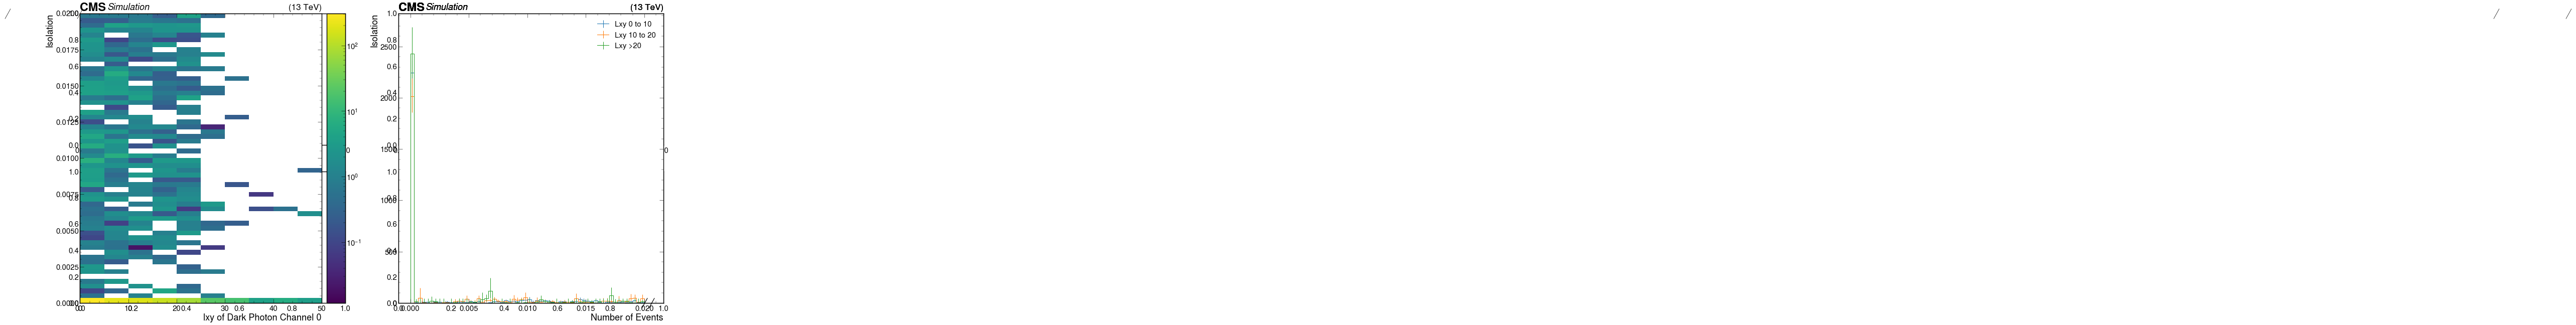

In [18]:
for sample in samples:
    hists = out[sample]["hists"]
plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[1], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 0")
plt.ylabel("Isolation")
plt.xlim(0,50)
plt.subplot(1, 2, 2)
for sample in samples:
         hists = out[sample]["hists"]
utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[1],slice(0, 3, sum),:], label = "Lxy 0 to 10",density=True)
utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[1],slice(3,5, sum),:], label = "Lxy 10 to 20",density=True)
utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[1],slice(5,101, sum),:], label = "Lxy >20" ,density=True)
plt.legend() 
print(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[1],slice(3, 101, sum),: 36])   
plt.xlabel("Number of Events")
plt.ylabel("Isolation")

In [12]:
(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[1],slice(0, 3, sum),:])

Hist(Regular(60, 0, 0.02, name='electron_GsfEleFull5x5SigmaIEtaIEtaCut'), storage=Weight()) # Sum: WeightedSum(value=928.601, variance=1519.76) (WeightedSum(value=1576.65, variance=2924.38) with flow)

508.1 Fail, 32.22% Fail

# Conversion veto: 

veto designed to identify electrons from photon conversions. A simple test to determine whether an electron fails or passes through the ID in an event. 

                  ┌──────────────────────────────────────────────────────────┐
[-inf,   0) 0     │                                                          │
[   0,   1) 126.1 │████████▊                                                 │
[   1, inf) 816.1 │█████████████████████████████████████████████████████████ │
                  └──────────────────────────────────────────────────────────┘


Text(0, 1, 'Conversion Veto')

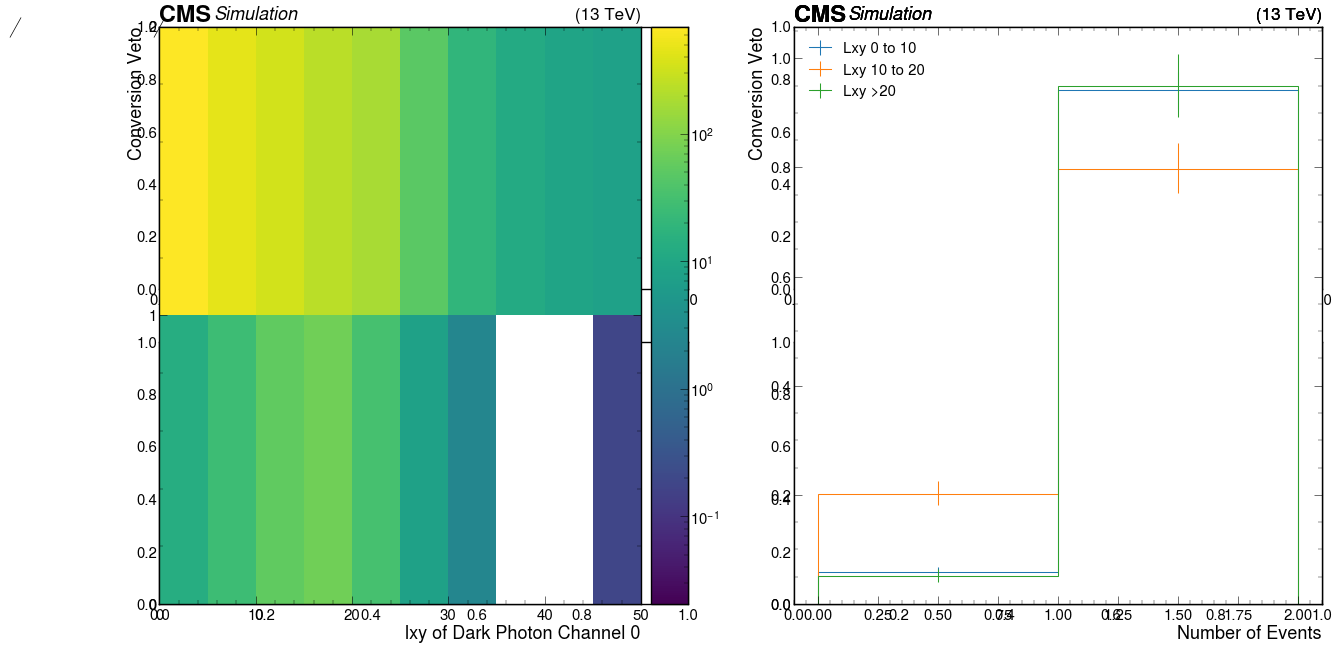

In [19]:
for sample in samples:
    hists = out[sample]["hists"]
plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(hists["electron_GsfEleConversionVetoCut2d"][channels[1], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 0")
plt.ylabel("Conversion Veto")
plt.xlim(0,50)
plt.subplot(1, 2, 2)
for sample in samples:
         hists = out[sample]["hists"]
utilities.plot(hists["electron_GsfEleConversionVetoCut2d"][channels[1],slice(0, 3, sum),:], label = "Lxy 0 to 10",density=True)
utilities.plot(hists["electron_GsfEleConversionVetoCut2d"][channels[1],slice(3,5, sum),:], label = "Lxy 10 to 20",density=True)
utilities.plot(hists["electron_GsfEleConversionVetoCut2d"][channels[1],slice(5,101, sum),:], label = "Lxy >20" ,density=True)
plt.legend() 
print(hists["electron_GsfEleConversionVetoCut2d"][channels[1],slice(3, 101, sum),: 1])   
plt.xlabel("Number of Events")
plt.ylabel("Conversion Veto")

In [14]:
(hists["electron_GsfEleConversionVetoCut2d"][channels[1],slice(0, 3, sum),:])

Hist(Regular(2, 0, 2, name='electron_GsfEleConversionVetoCut'), storage=Weight()) # Sum: WeightedSum(value=1576.65, variance=2924.38)

816.1 Fail, 51.76% Fail

# H/E:

ratio of the energy deposited in the single closest HCAL tower to the supercluster position inside a cone of ∆R = 0.15 in the (η, φ) plane to the energy deposited at ECAL.

                      ┌──────────────────────────────────────────────────────┐
[ -inf,     0) 0      │                                                      │
[    0, 0.005) 583.2  │█████████████████████████████████████████████████████ │
[0.005,  0.01) 19.87  │█▊                                                    │
[ 0.01, 0.015) 37.67  │███▍                                                  │
[0.015,  0.02) 51.86  │████▊                                                 │
[ 0.02, 0.025) 31.61  │██▉                                                   │
[0.025,  0.03) 24.27  │██▎                                                   │
[ 0.03, 0.035) 12.72  │█▏                                                    │
[0.035,  0.04) 13.33  │█▎                                                    │
[ 0.04, 0.045) 9.128  │▉                                                     │
[0.045,  0.05) 10.84  │█                                                     │
[ 0.05, 0.055) 8.353  │▊                            

Text(0, 1, 'H/E')

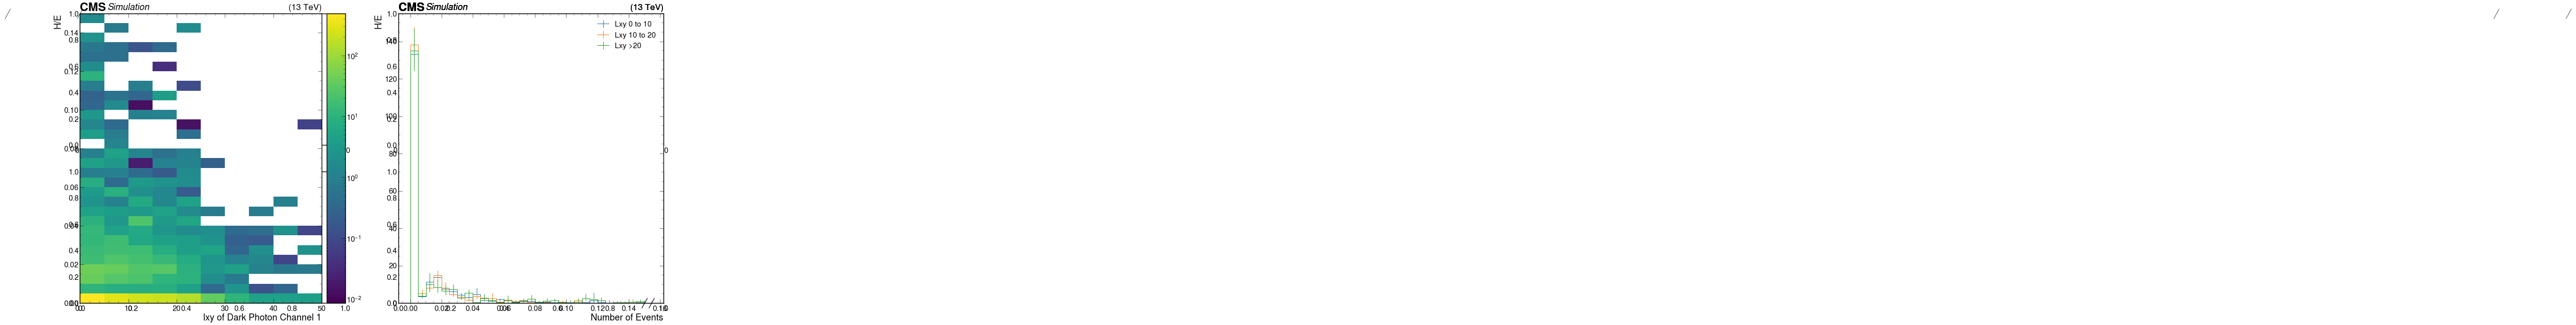

In [21]:
for sample in samples:
    hists = out[sample]["hists"]
plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(hists["electron_GsfEleHadronicOverEMEnergyScaledCut2d"][channels[1], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 1")
plt.ylabel("H/E")
plt.xlim(0,50)
plt.subplot(1, 2, 2)
for sample in samples:
         hists = out[sample]["hists"]
utilities.plot(hists["electron_GsfEleHadronicOverEMEnergyScaledCut2d"][channels[1],slice(0, 3, sum),:], label = "Lxy 0 to 10",density=True)
utilities.plot(hists["electron_GsfEleHadronicOverEMEnergyScaledCut2d"][channels[1],slice(3,5, sum),:], label = "Lxy 10 to 20",density=True)
utilities.plot(hists["electron_GsfEleHadronicOverEMEnergyScaledCut2d"][channels[1],slice(5,101, sum),:], label = "Lxy >20" ,density=True)
plt.legend() 
print(hists["electron_GsfEleHadronicOverEMEnergyScaledCut2d"][channels[1],slice(3, 101, sum),:])   
plt.xlabel("Number of Events")
plt.ylabel("H/E")

# Expected missing inner hits:

number of missing hits expected for GSF track.

                  ┌──────────────────────────────────────────────────────────┐
[-inf,   0) 0     │                                                          │
[   0, 0.1) 306.2 │███████████████████████████▍                              │
[ 0.1, 0.2) 0     │                                                          │
[ 0.2, 0.3) 0     │                                                          │
[ 0.3, 0.4) 0     │                                                          │
[ 0.4, 0.5) 0     │                                                          │
[ 0.5, 0.6) 0     │                                                          │
[ 0.6, 0.7) 0     │                                                          │
[ 0.7, 0.8) 0     │                                                          │
[ 0.8, 0.9) 0     │                                                          │
[ 0.9,   1) 0     │                                                          │
[   1, inf) 636.1 │█████████████████████████████████

Text(0, 1, 'H/E')

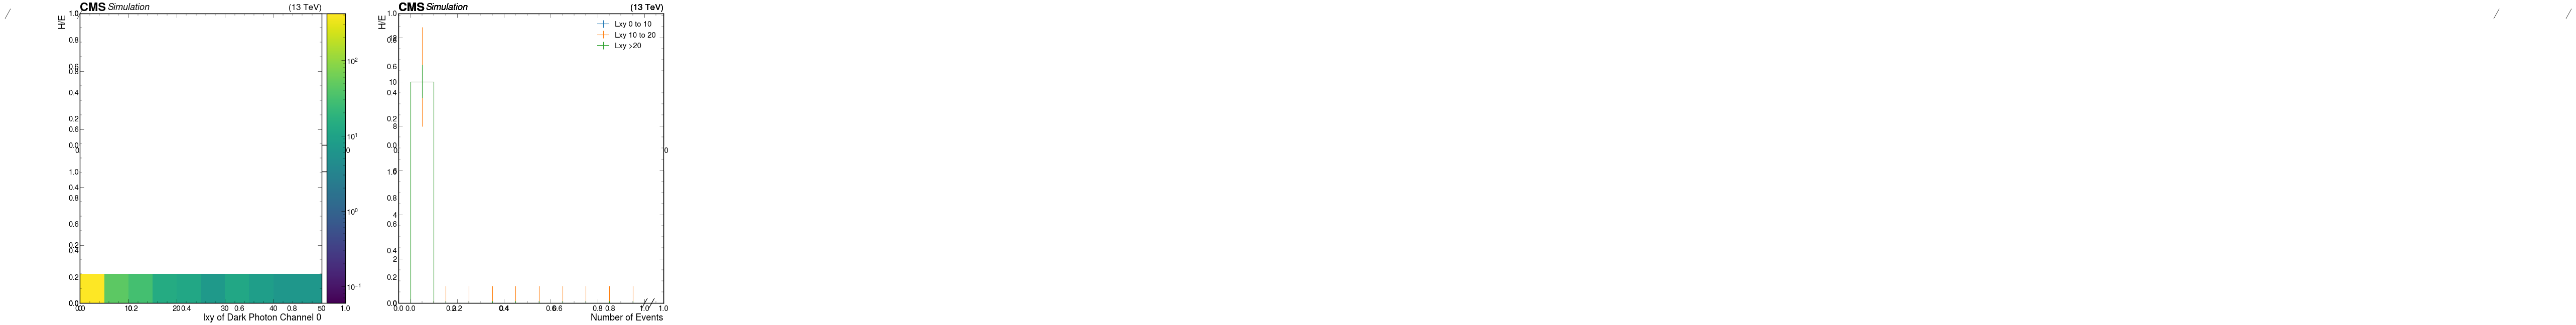

In [23]:
for sample in samples:
    hists = out[sample]["hists"]
plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[1], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 0")
plt.ylabel("H/E")
plt.xlim(0,50)
plt.subplot(1, 2, 2)
for sample in samples:
         hists = out[sample]["hists"]
utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[1],slice(0, 3, sum),:], label = "Lxy 0 to 10",density=True)
utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[1],slice(3,5, sum),:], label = "Lxy 10 to 20",density=True)
utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[1],slice(5,101, sum),:], label = "Lxy >20" ,density=True)
plt.legend() 
print(hists["electron_GsfEleMissingHitsCut2d"][channels[1],slice(3, 101, sum),:])   
plt.xlabel("Number of Events")
plt.ylabel("H/E")

In [25]:
(hists["electron_GsfEleMissingHitsCut2d"][channels[1],slice(0, 3, sum),:])

Hist(Regular(10, 0, 1, name='electron_GsfEleMissingHitsCut'), storage=Weight()) # Sum: WeightedSum(value=498.281, variance=954.398) (WeightedSum(value=1576.65, variance=2924.38) with flow)

636.1 Fail, 40.35% Fail

# Percentages Failed

In [ ]:
#Totals, Failed, Rate

In [39]:
lxy = [0,4,6,102]
binnum = 34
hists =  output["out"]["2Mu2E_100GeV_0p25GeV_20mm"]["hists"]
for histname in ["electron_GsfEleDEtaInSeedCut2d"]:
    values = output["out"]["2Mu2E_100GeV_0p25GeV_20mm"]["hists"][histname][channels[1],:,:].values(flow=True)
    print(histname)
    for i in range(0,3):
# Add up all electrons in that lxy range 
        total = values[lxy[i]:lxy[i+1],:].sum()
  # Add up all electrons in that lxy range that are in a bin greater than binnum
        fail = values[lxy[i]:lxy[i+1],binnum:].sum()
        rate = fail/total*100
        print(total, fail, rate)

electron_GsfEleDEtaInSeedCut2d
1576.647319161828 368.430108663626 23.367946920398765
515.1309506879188 195.94291525892913 38.03749609633474
427.09803732782893 236.13271762356453 55.28770843831236


In [40]:
lxy = [0,4,6,102]
binnum = 75
hists =  output["out"]["2Mu2E_100GeV_0p25GeV_20mm"]["hists"]
for histname in ["electron_GsfEleDPhiInCut2d"]:
    values = output["out"]["2Mu2E_100GeV_0p25GeV_20mm"]["hists"][histname][channels[1],:,:].values(flow=True)
    print(histname)
    for i in range(0,3):
# Add up all electrons in that lxy range 
        total = values[lxy[i]:lxy[i+1],:].sum()
  # Add up all electrons in that lxy range that are in a bin greater than binnum
        fail = values[lxy[i]:lxy[i+1],binnum:].sum()
        rate = fail/total*100
        print(total, fail, rate)

electron_GsfEleDPhiInCut2d
709.9214073927142 47.274450931698084 6.659110492993883
367.98605946509633 30.94524742756039 8.409353189232856
1440.9688403197651 261.105649555524 18.12014543614851


In [50]:
lxy = [0,4,6,102]
binnum = 52
hists =  output["out"]["2Mu2E_100GeV_0p25GeV_20mm"]["hists"]
for histname in ["electron_GsfEleEInverseMinusPInverseCut2d"]:
    values = output["out"]["2Mu2E_100GeV_0p25GeV_20mm"]["hists"][histname][channels[1],:,:].values(flow=True)
    print(histname)
    for i in range(0,3):
# Add up all electrons in that lxy range 
        total = values[lxy[i]:lxy[i+1],:].sum()
  # Add up all electrons in that lxy range that are in a bin greater than binnum
        fail = values[lxy[i]:lxy[i+1],binnum:].sum()
        rate = (fail/total)*100
        print(total, fail, rate)

electron_GsfEleEInverseMinusPInverseCut2d
1576.647319161828 29.26058369735256 1.8558737481574494
515.1309506879188 22.788397759199142 4.423806748316509
427.09803732782893 82.35435874952236 19.282307936786275


In [51]:
lxy = [0,4,6,102]
binnum = 36
hists =  output["out"]["2Mu2E_100GeV_0p25GeV_20mm"]["hists"]
for histname in ["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"]:
    values = output["out"]["2Mu2E_100GeV_0p25GeV_20mm"]["hists"][histname][channels[1],:,:].values(flow=True)
    print(histname)
    for i in range(0,3):
# Add up all electrons in that lxy range 
        total = values[lxy[i]:lxy[i+1],:].sum()
  # Add up all electrons in that lxy range that are in a bin greater than binnum
        fail = values[lxy[i]:lxy[i+1],binnum:].sum()
        rate = (fail/total)*100
        print(total, fail, rate)

electron_GsfEleFull5x5SigmaIEtaIEtaCut2d
1576.647319161828 752.0974112839613 47.70232392135667
515.1309506879188 245.00000028358772 47.56072217295594
427.09803732782893 264.49751024186844 61.92899220439341


In [52]:
lxy = [0,4,6,102]
binnum = 1
hists =  output["out"]["2Mu2E_100GeV_0p25GeV_20mm"]["hists"]
for histname in ["electron_GsfEleConversionVetoCut2d"]:
    values = output["out"]["2Mu2E_100GeV_0p25GeV_20mm"]["hists"][histname][channels[1],:,:].values(flow=True)
    print(histname)
    for i in range(0,3):
# Add up all electrons in that lxy range 
        total = values[lxy[i]:lxy[i+1],:].sum()
  # Add up all electrons in that lxy range that are in a bin greater than binnum
        fail = values[lxy[i]:lxy[i+1],binnum:].sum()
        rate = (fail/total)*100
        print(total, fail, rate)

electron_GsfEleConversionVetoCut2d
1576.647319161828 1576.647319161828 100.0
515.1309506879188 515.1309506879188 100.0
427.09803732782893 427.09803732782893 100.0


In [ ]:
#why does it say 100% failed.. I thought it would be close to half?

In [53]:
lxy = [0,4,6,102]
binnum = 0
hists =  output["out"]["2Mu2E_100GeV_0p25GeV_20mm"]["hists"]
for histname in ["electron_GsfEleMissingHitsCut2d"]:
    values = output["out"]["2Mu2E_100GeV_0p25GeV_20mm"]["hists"][histname][channels[1],:,:].values(flow=True)
    print(histname)
    for i in range(0,3):
# Add up all electrons in that lxy range 
        total = values[lxy[i]:lxy[i+1],:].sum()
  # Add up all electrons in that lxy range that are in a bin greater than binnum
        fail = values[lxy[i]:lxy[i+1],binnum:].sum()
        rate = (fail/total)*100
        print(total, fail, rate)

electron_GsfEleMissingHitsCut2d
1576.647319161828 1576.647319161828 100.0
515.1309506879188 515.1309506879188 100.0
427.09803732782893 427.09803732782893 100.0
